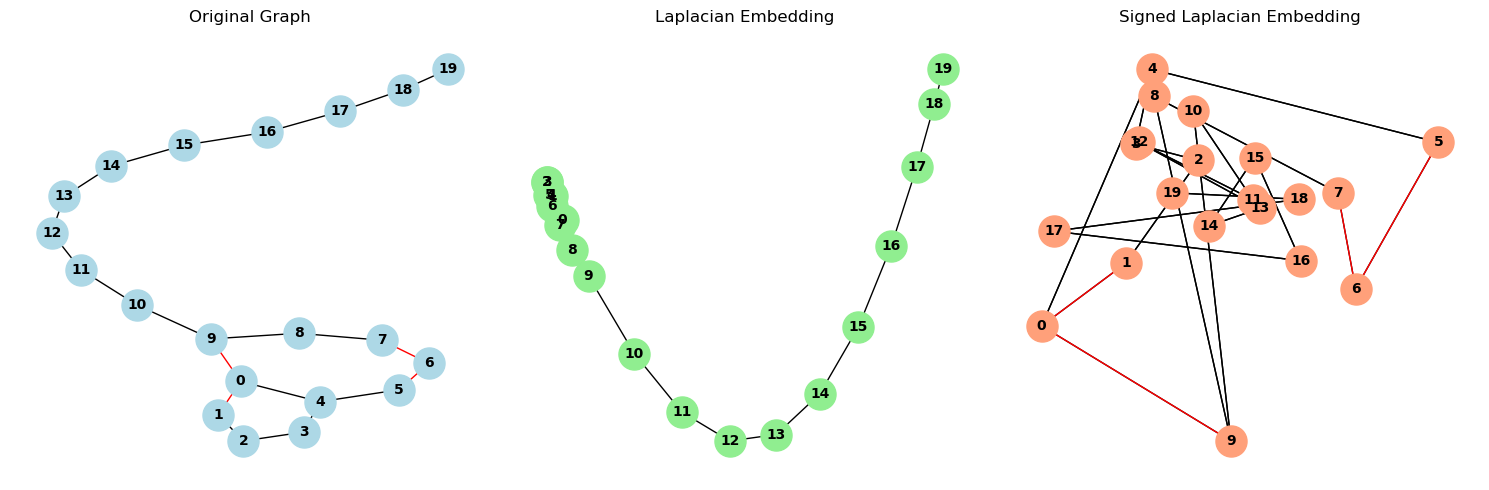

Note: The first edge in the graph has been set to a negative weight (-1).
The negative edge is shown in red in the Signed Laplacian Embedding plot.


In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from sklearn.decomposition import PCA


def laplacian_embedding(G, k=2):
    L = nx.laplacian_matrix(G).toarray()
    eigenvalues, eigenvectors = eigh(L)
    return eigenvectors[:, 1:k+1]  # Still discarding first eigenvector for standard Laplacian

def signed_laplacian_embedding(G, k=2):
    A = nx.adjacency_matrix(G).toarray()
    D = np.diag(np.sum(np.abs(A), axis=1))
    L_signed = D - A
    eigenvalues, eigenvectors = eigh(L_signed)
    return eigenvectors[:, :k]  # Using all eigenvectors including the first one
def project_to_2d(embedding):
    if embedding.shape[1] > 2:
        pca = PCA(n_components=2)
        return pca.fit_transform(embedding)
    return embedding
# Create a random graph
n = 20
p = 0.4
G = nx.Graph()
G.add_nodes_from(range(n))
G.add_edges_from([(i, i+1) for i in range(n-1)])
G.add_edge(0, 9)
G.add_edge(0, 4)

# Perform Laplacian embedding
pos_laplacian = laplacian_embedding(G)

# Create a layout for the original graph
original_layout = nx.spring_layout(G)

# Draw the original graph

plt.figure(figsize=(15, 5))

# Draw the Laplacian embedding
plt.subplot(132)
pos_laplacian_dict = {i: pos_laplacian[i] for i in range(n)}
nx.draw(G, pos=pos_laplacian_dict, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Laplacian Embedding")

# Make one of the links negative
nedges = [(0, 1), (0, 9), (6, 7), (5, 6)]
for u, v in nedges:
    G[u][v]['weight'] = -1

# Perform signed Laplacian embedding
pos_signed_laplacian = signed_laplacian_embedding(G, k=20)
pos_signed_laplacian_2d = project_to_2d(pos_signed_laplacian)
pos_signed_laplacian_dict = {i: pos_signed_laplacian_2d[i] for i in range(n)}

# Draw the signed Laplacian embedding
plt.subplot(133)
nx.draw(G, pos=pos_signed_laplacian_dict, with_labels=True, node_color='lightsalmon', node_size=500, font_size=10, font_weight='bold')
edge_colors = ['red' if G[u][v].get('weight', 1) < 0 else 'black' for u, v in G.edges()]
nx.draw_networkx_edges(G, pos=pos_signed_laplacian_dict, edge_color=edge_colors)
plt.title("Signed Laplacian Embedding")

plt.subplot(131)
nx.draw(G, pos=original_layout, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color=edge_colors)
plt.title("Original Graph")

plt.tight_layout()
plt.show()

print("Note: The first edge in the graph has been set to a negative weight (-1).")
print("The negative edge is shown in red in the Signed Laplacian Embedding plot.")